## Final Project Submission

Please fill out:
* Student name:     Jennifer Lavoie
* Student pace:     self paced 
* Scheduled project review date/time: 
* Instructor name:  Jeff Herman 
* Blog post URL:


## Data Import Section

This section of code begins reading in of all provided csv files to explore the available data in order to determine what questions might be able to be answered using this data. 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## This section is for the import of the csv relating to IMDb data. 

In [2]:
imdb_df1 = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

#dropping the birth year and death year columns as do not intend to use these in analysis
imdb_df1.drop(['birth_year', 'death_year'], axis=1, inplace=True)

imdb_df1.head()


,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


This csv contains "nconst" which appears to be an ID to reference the professionals associated with movie titles.  The titles are given also as an ID. 

In [3]:
print(len(imdb_df1)) #606648

606648


In [4]:
imdb_df2 = pd.read_csv('zippedData/imdb.title.akas.csv.gz')

# dropping these two columns which I do not intend to use in analysis for simplicity and readability 
imdb_df2.drop(['attributes', 'types'], axis=1, inplace=True)

imdb_df2.head()


,title_id,ordering,title,region,language,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,0.0
4,tt0369610,14,Jurassic World,FR,NaN,0.0


This csv links movie titles with their ID, indicates the region of release, language of the movie and whether or not the title is the original title.  It appears that the language column contains a lot of NaNs and might not be very useful in analysis. I won't be using this df any further for the analysis based on the questions I am asking.  

In [5]:
imdb_df3 = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

imdb_df3.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


This csv links the title of the movie to it's ID as well, giving it the name "tconst."  It also links it to a genre and gives information about the title the movie is known by v. original title. It also links the title to its release year and length of the movie. 

In [6]:
print(len(imdb_df3)) #146144

146144


In [7]:
imdb_df4 = pd.read_csv('zippedData/imdb.title.crew.csv.gz')

imdb_df4.head()


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


This csv links the movie's ID, 'tconst' to the ID given in the first csv I imported from this set, identifying the writers and directors for the movie titles.  

In [8]:
print(len(imdb_df4)) #146144

146144


In [9]:
imdb_df5 = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

# dropping the characters column as I will not be using this in my analysis.  It linked actors to their characters
# in a particular movie ID and is NaN for everyone else.  
imdb_df5.drop('characters', axis=1, inplace=True)

imdb_df5.head()


,tconst,ordering,nconst,category,job
0,tt0111414,1,nm0246005,actor,NaN
1,tt0111414,2,nm0398271,director,NaN
2,tt0111414,3,nm3739909,producer,producer
3,tt0323808,10,nm0059247,editor,NaN
4,tt0323808,1,nm3579312,actress,NaN


This csv links movie titles to various job titles, including actor, director, producer, etc.  It links again with "nconst." Names for "nconst" are linked in the first csv I read in on this project.  

In [10]:
imdb_df6 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

imdb_df6.head()


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


This csv links the average rating of a movie and the number of votes it received by "tconst" movie ID.  

In [11]:
print(len(imdb_df6)) #73856

73856


## This section is the import of the csv for data from TheMovieDB.org

In [12]:
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

# dropping the blank column inserted upon read-in of this csv
tmdb_df.drop('Unnamed: 0', axis=1, inplace=True)

# Converting vote_average to float
tmdb_df['vote_average'] = pd.to_numeric(tmdb_df['vote_average'],errors='coerce')

tmdb_df.head()


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


This csv gives information on a movie's ranking on this web site and the number of votes, as well as a popularity ranking. It also assigns an ID to the movie, which won't link to the IMDb ID, and it provies genre_ids, but does not provide a way to decode to what genre those ids are linked.  

In [13]:
print(len(tmdb_df)) #26517

26517


In [14]:
# Verifying no NaN values in the vote average column
tmdb_df['vote_average'].isna().sum()

0

In [15]:
# Verifying no odd characters or strange data in this column
tmdb_df['vote_average'].unique()

array([ 7.7,  6.8,  7.9,  8.3,  6.1,  7.4,  7.2,  7.5,  6.6,  6. ,  6.7,
        4.5,  7.3,  8.1,  6.3,  4.6,  5.7,  5.9,  8.2,  6.2,  6.4,  7.6,
        6.5,  7.1,  5.6,  5.3,  7. ,  5.8,  4.9,  5.1,  5.5,  6.9,  5.4,
        7.8,  4.7,  4.1,  4.8,  3.2,  8. ,  3.7,  5.2,  2.7,  4.4,  5. ,
        2.9,  2. ,  4. ,  4.2,  3.9,  4.3,  3.5,  3.8,  3.6,  3.4,  3.3,
        3.1,  3. ,  2.5,  2.6, 10. ,  2.2,  1.7,  2.8,  2.3,  1.6,  1.8,
        2.4,  1.5,  8.6,  1.9,  9. ,  8.7,  0.5,  1. ,  8.4,  2.1,  8.8,
        1.3,  9.5,  8.5,  9.8,  0. ,  8.9,  9.3,  9.4,  9.2,  0.8,  1.2,
        1.4,  9.1,  9.7])

## This section is for the import of the csv relating to Box Office Mojo data

In [16]:
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

cols = ['domestic_gross', 'foreign_gross']

for col in cols:
    bom_df[col] = pd.to_numeric(bom_df[col], errors='coerce')

bom_df.head()



,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


This csv links a movie title to its domestic and foreign profit, as well as the year released. It provides an abbreviation for studio, but no key available to determine what they mean.  

In [17]:
print(len(bom_df)) # 3387

3387


In [18]:
# Look for NaN values in the columns of interest
for col in cols:
    print(col, '\n', bom_df[col].isna().sum())

# domestic - 28 Nans; foreign - 1355.  

domestic_gross 
 28
foreign_gross 
 1355


In [19]:
# Look for any odd values in the columns of interest
for col in cols:
    print(col, '\n', bom_df[col].value_counts(), '\n\n')
    
# None found

domestic_gross 
 1100000.0      32
1000000.0      30
1300000.0      30
1200000.0      25
1400000.0      23
               ..
68800.0         1
87000000.0      1
739000.0        1
336000000.0     1
727000.0        1
Name: domestic_gross, Length: 1797, dtype: int64 


foreign_gross 
 1200000.0      23
1100000.0      14
4200000.0      12
1900000.0      12
2500000.0      11
               ..
248100000.0     1
494100000.0     1
9500.0          1
92000000.0      1
128000.0        1
Name: foreign_gross, Length: 1199, dtype: int64 




## This section is for the import of data from 'tn'

In [20]:
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# list of columns that will be converted to numeric
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

# removal of $ and , so that columns can be converted to numeric
tn_df[cols] = tn_df[cols].replace({'\$':'', ',':''}, regex = True)

# conversion of the specified columns to numeric
for col in cols:
    tn_df[col] = pd.to_numeric(tn_df[col], errors='coerce')

tn_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


It is unclear which site this csv came from.  It links release date with movie title, production budget, and the domestic and worldwide gross of each movie. 

In [21]:
print(len(tn_df)) # 5782


5782


In [22]:
# Verifying no NaN values in the columns necessary for analysis
for col in cols:
    print(col, '\n', tn_df[col].isna().sum())

# No NaN values present

production_budget 
 0
domestic_gross 
 0
worldwide_gross 
 0


In [23]:
# Look for any odd values in the columns of interest
for col in cols:
    print(col, '\n', tn_df[col].value_counts(), '\n\n')

# There are a number of movies with 0 revenue domestic and some with 0 revenue foreign.  

production_budget 
 20000000    231
10000000    212
30000000    177
15000000    173
25000000    171
           ... 
16400000      1
103000        1
6537890       1
780000        1
28500000      1
Name: production_budget, Length: 509, dtype: int64 


domestic_gross 
 0           548
8000000       9
2000000       7
7000000       7
10000000      6
           ... 
449865        1
10547117      1
4476235       1
56653         1
40157856      1
Name: domestic_gross, Length: 5164, dtype: int64 


worldwide_gross 
 0            367
8000000        9
7000000        6
2000000        6
4000000        4
            ... 
166000000      1
42843521       1
101173038      1
478595         1
12996          1
Name: worldwide_gross, Length: 5356, dtype: int64 




## This section is for the import of the Rotten Tomatoes data

In [24]:
rt_df1 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

rt_df1.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


This file provies information on movie titles, including an ID that is assigned to each movie, but no movie title. Will not be able to link this data to the other files.  

In [25]:
print(len(rt_df1)) # 1560

1560


In [26]:
# checking to see how many of the movies are missing box_office values.  
rt_df1['box_office'].isna().sum() #1220

1220

I can analyze ratings v. box office for only 340 movies for this dataset. There is no way to connect this data to other sets as there is no ID in common and no movie titles listed for this data.  Would not be able to match any of this data to the data set that contains film budget.  

In [27]:
# I did not import the text portion of the critic reviews as it created problems with the import and I had no need for 
# that information in this particular analysis.
rt_df2 = pd.read_csv('Data/rt.reviews.tsv', usecols = ['id','rating', 'fresh', 'critic', 
                   'top_critic', 'publisher', 'date'], sep='\t')
rt_df2.groupby('id') 

rt_df2.head()


,id,rating,fresh,critic,top_critic,publisher,date
0,3,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


This data provides a link to the other Rotten Tomatoes data via movie ID.  I can link those movies to their Rotten Tomatoes rating using this data. Each movie ID has more than one row associated with a review from a different critic. 

In [28]:
rt_df2['rating']= rt_df2['rating'].str.split("/", n = 1, expand = True) 

rt_df2.head()

,id,rating,fresh,critic,top_critic,publisher,date
0,3,3,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


Preparing the data to the mean of the ratings for each movie given that there are many movies that have NaN values for ratings by particular critics.  The mean rating will be more informative. The ratings are #/5 format, since the ratings are based on a 1-5 scale.  Splitting the data so that only the rating remains. 

In [29]:
# Removing Nan rows
rt_df2 = rt_df2[rt_df2['rating'].notna()]

rt_df2.head()

,id,rating,fresh,critic,top_critic,publisher,date
0,3,3,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,2,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,2,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"


In [30]:
#Noting that some of the ratings are letters rather than numbers, print a list of unique values found in the ratings

print(rt_df2['rating'].unique())

['3' 'C' '2' 'B-' 'B' '4' '6' '1' '8' '2.5' '2.0' '7' 'A-' '5' 'F' '3.5'
 'D+' '1.5' 'B+' '9' '7.5' '5.5' 'C-' 'C+' '0' '0.5' 'D' '3.1' '4.5' 'D-'
 'A+' 'A' '4.0' '9.5' '2.1' '6.5' '3.7' '8.4' '7.2' '2.2' '7.7' '5.0'
 '8.5' '3.0' '2.3' '8.6' '2.7' '4.2' '5.8' '7.1' 'N' 'R' '5.9' '2.4' '1.9'
 '4.9' '7.4' '8.8' '3.8' '6.8' '7.3' '7.0' '3.2' '6.3' '7.6' '8.1' '3.6'
 '1.8' '8.9' '8.2' '8.3' '2.6' '4.1' 'F+' '6.0' '1.0' '7.9' '8.7' '4.3'
 '9.6' '9.0' '1.7' '6.7' '8.0' '9.2' '5.2' '4.7' '6.2' '3.4' '9.7' '3.3'
 '4.8' '1.6' '1-5' '7.8' 'F-' '4.4' '6.9' 'T' '9.8' '3 1']


In [31]:
# This will remove all of the values found in the ratings column that are not numbers. 
letters = ['C', 'B-', 'B', 'A-', 'F', 'D+', 'B+', 'C-', 'C+', 'D', 'D-', 'A', 'A+', 'N', 'R', 'F+',
          'F-', 'T']

rt_df2 = rt_df2[~rt_df2['rating'].isin(letters)]

rt_df2.head()

print(rt_df2['rating'].unique())

['3' '2' '4' '6' '1' '8' '2.5' '2.0' '7' '5' '3.5' '1.5' '9' '7.5' '5.5'
 '0' '0.5' '3.1' '4.5' '4.0' '9.5' '2.1' '6.5' '3.7' '8.4' '7.2' '2.2'
 '7.7' '5.0' '8.5' '3.0' '2.3' '8.6' '2.7' '4.2' '5.8' '7.1' '5.9' '2.4'
 '1.9' '4.9' '7.4' '8.8' '3.8' '6.8' '7.3' '7.0' '3.2' '6.3' '7.6' '8.1'
 '3.6' '1.8' '8.9' '8.2' '8.3' '2.6' '4.1' '6.0' '1.0' '7.9' '8.7' '4.3'
 '9.6' '9.0' '1.7' '6.7' '8.0' '9.2' '5.2' '4.7' '6.2' '3.4' '9.7' '3.3'
 '4.8' '1.6' '1-5' '7.8' '4.4' '6.9' '9.8' '3 1']


In [32]:
# To take the mean of the ratings, need to convert them to float from str.  Some are decimals, need float not int.  
rt_df2['rating'] = pd.to_numeric(rt_df2['rating'],errors='coerce')

rt_df2.head()

,id,rating,fresh,critic,top_critic,publisher,date
0,3,3.0,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
7,3,2.0,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
12,3,2.0,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
14,3,3.0,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012"
15,3,3.0,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012"


In [33]:
print(len(rt_df2)) #34447

34447


In [34]:
rt_df3 = rt_df2.groupby('id', as_index=False)['rating'].mean()
rt_df3 = rt_df3.rename(columns={'rating': 'mean_rating'})

rt_df3.head()

,id,mean_rating
0,3,3.303191
1,5,3.500000
2,6,2.987179
3,8,4.055556
4,10,2.722222


This dataframe I created gives only the ID of the movie and the mean rating of that movie. It can be combined with rt_df1 to give a dataframe that contains all the movies in the rt data and their respective ratings.  

In [35]:
print(len(rt_df3)) #1077

1077


## With the data available, I will seek to answer the following 4 questions:

1.  Does the size of the movie budget impact ratings awarded to the movie and do ratings have a relationship to the domestic gross income of a movie? 
2.  Does the size of the movie budget impact the domestic gross income of a movie?
3.  Does choice of director for the movie appear to impact the domestic gross income of a movie? 
4.  Do ratings have a relationship with who directs the movie?  

## Code and Visualizations pertinent to answering Question 1 

Does the size of the movie budget impact ratings awarded to the movie and do ratings have a relationship to the gross income of a movie? 

In [36]:
imdb_data = pd.merge(imdb_df3, imdb_df6, how = 'inner', left_on ='tconst', right_on ='tconst')

imdb_data['averagerating'] = pd.to_numeric(imdb_data['averagerating'],errors='coerce')

imdb_data.head()



,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


I created this dataframe that combines the movie titles with their ratings for IMDb data.  This combindation dataframe can be used for both questions 1 and 4.  Inner join provides for only those movies that appear in both tables.  (want dataframe of only movies that have ratings associated with them.)

In [37]:
print(len(imdb_data)) # 73856
 

73856


The length of this dataframe is less than df3 and the same as df6 since this will only include movies that have a rating score on IMDb.  This dataframe can be used to answer the question pertaining to budget effect on ratings. 

In [38]:
# Verifying no NaN values in the average rating column
imdb_data['averagerating'].isna().sum() 

0

In [39]:
# Verifying no odd characters or data is in the average rating column 
print(imdb_data['averagerating'].unique())

# None found.

[ 7.   7.2  6.9  6.1  6.5  4.1  8.1  6.8  4.6  7.6  7.5  7.8  4.   8.8
  1.9  6.7  6.6  5.9  7.1  7.4  3.9  5.5  5.1  7.9  6.2  6.3  5.   6.
  5.6  7.3  4.9  6.4  3.3  5.7  8.6  4.8  4.5  4.2  8.7  4.7  5.2  8.3
  9.1  3.4  5.8  5.4  8.5  3.2  3.6  8.   3.8  7.7  4.3  3.   5.3  3.7
  3.5  9.3  8.9  9.   2.3  8.2  2.7  2.8  1.7  4.4  2.2  9.4  8.4  9.2
  9.7  3.1 10.   9.8  2.6  2.5  1.4  2.1  2.4  2.9  1.8  1.6  2.   1.
  1.2  1.5  1.3  1.1  9.5  9.6  9.9]


In [40]:
imdb_tn_merge = pd.merge(imdb_data, tn_df, how = 'inner', left_on ='primary_title', right_on ='movie')

# Dropping some columns that won't pertain to this analysis for readability
imdb_tn_merge.drop(['runtime_minutes', 'release_date', 'movie', 'genres', 'worldwide_gross'], axis=1, inplace=True)

imdb_tn_merge.head()

,tconst,primary_title,original_title,start_year,averagerating,numvotes,id,production_budget,domestic_gross
0,tt0249516,Foodfight!,Foodfight!,2012,1.9,8248,26,45000000,0
1,tt0326592,The Overnight,The Overnight,2010,7.5,24,21,200000,1109808
2,tt3844362,The Overnight,The Overnight,2015,6.1,14828,21,200000,1109808
3,tt0337692,On the Road,On the Road,2012,6.1,37886,17,25000000,720828
4,tt4339118,On the Road,On the Road,2014,6.0,6,17,25000000,720828


To address the question of ratings v. budget, I created a dataframe that links imdb data to data found in the tn_df data, the only dataset that has movie budget information. This will also contain some info pertaining to domestic revenue for the movies that appear in both df being merged.  Some movie titles are listed in duplicate, but appears have different release years. 

In [41]:
print(len(imdb_tn_merge)) # 2875

2875


Information concerning budget is available for 2875 of the imdb movies (note: this also includes gross revnue for these movies)

In [42]:
imdb_bom_merge = pd.merge(imdb_data, bom_df, how = 'inner', left_on ='primary_title', right_on ='title')

# Dropping some columns that won't pertain to this analysis for readability
imdb_bom_merge.drop(['runtime_minutes', 'year', 'title', 'genres', 'studio', 'foreign_gross'], axis=1, inplace=True)

imdb_bom_merge.head()

,tconst,primary_title,original_title,start_year,averagerating,numvotes,domestic_gross
0,tt0315642,Wazir,Wazir,2016,7.1,15378,1100000.0
1,tt0337692,On the Road,On the Road,2012,6.1,37886,744000.0
2,tt4339118,On the Road,On the Road,2014,6.0,6,744000.0
3,tt5647250,On the Road,On the Road,2016,5.7,127,744000.0
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,7.3,275300,58200000.0


Dataframe created that combines imdb data with bom data for additional information on domestic gross revenue for movie titles. Some movie titles are listed in duplicate, but appears have different release years. 

In [43]:
print(len(imdb_bom_merge)) #3027

3027


In [44]:
imdb_revenue_merge = pd.merge(imdb_tn_merge, imdb_bom_merge, how = 'outer', 
                              left_on = ['tconst', 'primary_title', 'domestic_gross', 'averagerating', 
                                         'original_title', 'numvotes', 'start_year'], 
                              right_on =['tconst', 'primary_title', 'domestic_gross', 'averagerating', 
                                         'original_title', 'numvotes', 'start_year'])

imdb_revenue_merge.drop(['id'], axis=1, inplace=True)

imdb_revenue_merge.drop_duplicates(subset=None, keep='first', inplace=True)

imdb_revenue_merge.head()

,tconst,primary_title,original_title,start_year,averagerating,numvotes,production_budget,domestic_gross
0,tt0249516,Foodfight!,Foodfight!,2012,1.9,8248,45000000.0,0.0
1,tt0326592,The Overnight,The Overnight,2010,7.5,24,200000.0,1109808.0
2,tt3844362,The Overnight,The Overnight,2015,6.1,14828,200000.0,1109808.0
3,tt0337692,On the Road,On the Road,2012,6.1,37886,25000000.0,720828.0
4,tt4339118,On the Road,On the Road,2014,6.0,6,25000000.0,720828.0


This database merges both dataframes that contain revenue info for imdb movies.  It will also still contain the budget information for the movies for which that is available.  

In [45]:
print(len(imdb_revenue_merge)) # 5902

5902


In [46]:
cols = ['production_budget', 'domestic_gross']

for col in cols:
    print(col, '\n', imdb_revenue_merge[col].isna().sum())


production_budget 
 3027
domestic_gross 
 22


In [47]:
imdb_revenue_merge['domestic_gross'].dropna(inplace=True)

imdb_revenue_merge['domestic_gross'].isna().sum()

0

In [48]:
imdb_revenue_merge

,tconst,primary_title,original_title,start_year,averagerating,numvotes,production_budget,domestic_gross
0,tt0249516,Foodfight!,Foodfight!,2012,1.9,8248,45000000.0,0.0
1,tt0326592,The Overnight,The Overnight,2010,7.5,24,200000.0,1109808.0
2,tt3844362,The Overnight,The Overnight,2015,6.1,14828,200000.0,1109808.0
3,tt0337692,On the Road,On the Road,2012,6.1,37886,25000000.0,720828.0
4,tt4339118,On the Road,On the Road,2014,6.0,6,25000000.0,720828.0
...,...,...,...,...,...,...,...,...
5897,tt8331988,The Chambermaid,La camarista,2018,7.1,147,NaN,300.0
5898,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,6.5,607,NaN,747000.0
5899,tt8427036,Helicopter Eela,Helicopter Eela,2018,5.4,673,NaN,72000.0
5900,tt9078374,Last Letter,"Ni hao, Zhihua",2018,6.4,322,NaN,181000.0


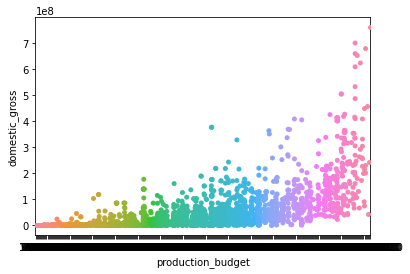

In [49]:
pd.qcut(imdb_revenue_merge['production_budget'], q=4)

0       (40000000.0, 425000000.0]
1           (1399.999, 5000000.0]
2           (1399.999, 5000000.0]
3        (17000000.0, 40000000.0]
4        (17000000.0, 40000000.0]
                  ...            
5897                          NaN
5898                          NaN
5899                          NaN
5900                          NaN
5901                          NaN
Name: production_budget, Length: 5902, dtype: category
Categories (4, interval[float64]): [(1399.999, 5000000.0] < (5000000.0, 17000000.0] < (17000000.0, 40000000.0] < (40000000.0, 425000000.0]]

In [50]:
bin_labels_4 = ['budget_1', 'budget_2', 'budget_3', 'budget_4']

imdb_revenue_merge['budget_quantiles'] = pd.qcut(imdb_revenue_merge['production_budget'], q=4)

imdb_revenue_merge['budget_bin'] = pd.qcut(imdb_revenue_merge['production_budget'], q=4, 
                                             labels=bin_labels_4)
imdb_revenue_merge

,tconst,primary_title,original_title,start_year,averagerating,numvotes,production_budget,domestic_gross,budget_quantiles,budget_bin
0,tt0249516,Foodfight!,Foodfight!,2012,1.9,8248,45000000.0,0.0,"(40000000.0, 425000000.0]",budget_4
1,tt0326592,The Overnight,The Overnight,2010,7.5,24,200000.0,1109808.0,"(1399.999, 5000000.0]",budget_1
2,tt3844362,The Overnight,The Overnight,2015,6.1,14828,200000.0,1109808.0,"(1399.999, 5000000.0]",budget_1
3,tt0337692,On the Road,On the Road,2012,6.1,37886,25000000.0,720828.0,"(17000000.0, 40000000.0]",budget_3
4,tt4339118,On the Road,On the Road,2014,6.0,6,25000000.0,720828.0,"(17000000.0, 40000000.0]",budget_3
...,...,...,...,...,...,...,...,...,...,...
5897,tt8331988,The Chambermaid,La camarista,2018,7.1,147,NaN,300.0,NaN,NaN
5898,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,6.5,607,NaN,747000.0,NaN,NaN
5899,tt8427036,Helicopter Eela,Helicopter Eela,2018,5.4,673,NaN,72000.0,NaN,NaN
5900,tt9078374,Last Letter,"Ni hao, Zhihua",2018,6.4,322,NaN,181000.0,NaN,NaN


In [62]:
x = imdb_revenue_merge['budget_bin'].value_counts()

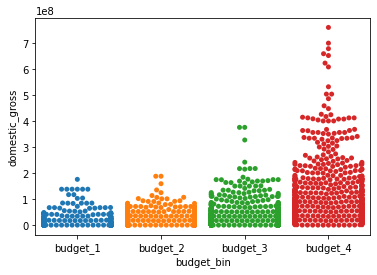

In [64]:
sns.swarmplot(x = 'budget_bin', y= 'domestic_gross', data=imdb_revenue_merge)

plt.show()


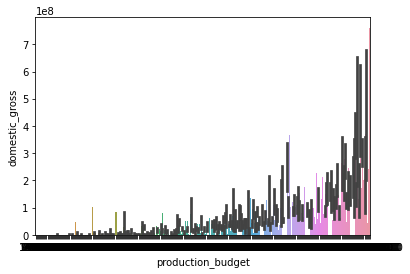

In [67]:
sns.barplot(x='production_budget', y='domestic_gross', data=imdb_revenue_merge)

This data base is a merge of the two dataframes having revenue data relating to imdb movies. 

## Discussion Concerning Question 1:



## Code and Visualizations pertinent to answering Question 2

Does the size of the movie budget impact the money made by the movie? 

## Discussion Concerning Question 2: 


## Code and Visualizations pertinent to answering Question 3

Does choice of director for the movie appear to impact the gross income of a movie? 

In [51]:
imdb_directors = pd.merge(imdb_df1, imdb_df4, how='inner', left_on = 'nconst', right_on = 'directors')

# dropping unnecessary columns.  
imdb_directors.drop(['writers', 'known_for_titles', 'primary_profession'], axis=1, inplace=True)

imdb_directors.head()


,nconst,primary_name,tconst,directors
0,nm0062879,Ruel S. Bayani,tt1592569,nm0062879
1,nm0062879,Ruel S. Bayani,tt8421806,nm0062879
2,nm0062879,Ruel S. Bayani,tt2057445,nm0062879
3,nm0062879,Ruel S. Bayani,tt2590280,nm0062879
4,nm0064023,Bryan Beasley,tt4512140,nm0064023


This dataframe will connect the name of the director to the movie ID.  

In [52]:
print(len(imdb_directors)) #124689

124689


In [53]:
director_movie_data = pd.merge(imdb_df3, imdb_directors, how = 'inner', left_on = 'tconst', right_on = 'tconst')

# Rename this column to better indicate what the column refers to in this combined dataframe.
director_movie_data = director_movie_data.rename(columns={'primary_name': 'director_name'})

director_movie_data.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,nconst,director_name,directors
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,Harnam Singh Rawail,nm0712540
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,Mani Kaul,nm0002411
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,Orson Welles,nm0000080
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,Hrishikesh Mukherjee,nm0611531
4,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,nm0398271,Frank Howson,nm0398271


This dataframe combines the IMDb data for all the movie titles with their director.  This can later be combined with profit information to determine who the directors are for the movies with the most profit.  Use for Question 3 and use with question 4 (need also imdb_df6 for that question).

In [54]:
print(len(director_movie_data)) # 124689

124689


Length of this data reduces total movies by number of movies with available director data.  

In [55]:
profit_bom = pd.merge(director_data, bom_df, how='inner', left_on = 'primary_title', right_on = 'title')
profit_bom.head()

NameError: name 'director_data' is not defined

## Discussion Concerning Question 3:


In [ ]:
budget = pd.merge(profit_bom, tn_df, how='inner',left_on='primary_title',right_on='movie')
budget.drop('domestic_gross_x', axis=1, inplace=True) # dropping the column with rounded domestic gross
budget = budget.rename(columns={'domestic_gross_y': 'domestic_gross'}) # rename unrounded column after dropping duplicate
budget.head()

In [ ]:
rt_data = pd.merge(rt_df1, rt_df3, how='inner',left_on='id',right_on='id')

# dropping these columns for readability and simplicity.  Won't use in analysis.
rt_data.drop(['currency', 'synopsis'], axis=1, inplace=True) 

rt_data.head()

## Code and Visualizations pertinent to answering Question 4

Do ratings have a relationship with who directs the movie? 

## Discussion Concerning Question 4:
